# _Isanda coronata_ : Size Weight Relationship

## Introduction

The length-weight relationship derived from the analysis of a sample of 48 specimens was conducted to examine potential cost benefit changes in the weight of tissue versus the total weight of the shell. A varience in the weight of tissue to weight of shell may indicate an advatage t size selectivity in prey selection.

## Method and Materials

Specimens were collected from the study site along the Palleranda foreshore on the 21st November, 1985. 

Each specimen was measured across the longest axis through the umbilis. 

  
### Weighing Method

1. Animals cleaned of adhering sand and detritus
2. Dried at 60 degrees C on blotting paper
3. Weighed on Cahn scale
4. Measured with ocular micrometer across the longest axis through the umbilis
5. The shell was then dissolved in 2.5% HCl
6. The remaining tissues was placed on foil dishes. Weight includes:
  1. periostracium
  2. operculum
7. Dried at 60 degrees C
8. Reweighed


### Notes
Tare set with 10 weight (silver) ??

## Data Import

Columns in the data file are:
- Size(mm)
- WtTotal       = total weight of dried animal 
- WtPaper       = the weight of the paper tray
- WtShellPaper  = the weight minus the shell (includes paper)
- WtTissue      =  WtShellPaper - WtPaper
- WtShell       = WtTotal - WtTissue
- TissueToShell = ration of tissues to shell weight

In [43]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

DATA = '../data/isanda_coronata_size_wt.csv'

df = pd.read_csv(DATA)
df = df.sort_values(by=['Size(mm)'])

df.head()

,Size(mm),WtTotal,WtPaper,WtShellPaper,WtTissue,WtShell,TissueToShell
21,1.8,1.39,2.95,3.10,0.15,1.24,0.12
44,1.9,1.94,2.98,3.19,0.21,1.73,0.12
22,1.9,1.54,3.09,3.23,0.14,1.40,0.10
11,2.0,1.96,3.12,3.38,0.26,1.70,0.15
10,2.1,1.89,3.08,3.32,0.24,1.65,0.15


In [52]:
df.shape

(48, 10)

## Analysis

Plot of size vs weight of shell and weight of tissue shows a power curve. Fit linear regression to obtain initial estimates of equation parameters on transformed data.

Ratio of weight tissue vs weight of shell appears to show no correlation with size. Therefore if shell weight is a good estimator of effort required to handle prey then there is no difference in the cost benefit ratio for different sizes (what does this mean!). Need to determine shell thickness to confirm.

Also need to know:
1. foraging activity -> time available for consumption
2. amount consumed vs size of prey
3. Number of prey that can be caught in a single foraging period
4. Probability of escape during drilling, some prey items have been found with partially drilled holes

In [45]:
popt_ewtot, pcov_ewtot = curve_fit(lambda t,a,b: a*np.exp(b*t),  df['Size(mm)'],  df['WtTotal'])
popt_ewshl, pcov_ewshl = curve_fit(lambda t,a,b: a*np.exp(b*t),  df['Size(mm)'],  df['WtShell'])
popt_ewtis, pcov_ewtis = curve_fit(lambda t,a,b: a*np.exp(b*t),  df['Size(mm)'],  df['WtTissue'])

print "Wt-Total ~= {} * exp({} * x)".format(popt_ewtot[0], popt_ewtot[1])
df['Calc-EWtTotal'] = popt_ewtot[0] * np.exp(popt_ewtot[1] * df['Size(mm)'])

print "Wt-Shell ~= {} * exp({} * x)".format(popt_ewshl[0], popt_ewshl[1])
df['Calc-EWtShell'] = popt_ewshl[0] * np.exp(popt_ewshl[1] * df['Size(mm)'])

print "Wt-Tissue ~= {} * exp({} * x)".format(popt_ewtis[0], popt_ewtis[1])
df['Calc-EWtTissue'] = popt_ewtis[0] * np.exp(popt_ewtis[1] * df['Size(mm)'])

Wt-Total ~= 0.520765390408 * exp(0.856584058147 * x)
Wt-Shell ~= 0.438740360984 * exp(0.870788543144 * x)
Wt-Tissue ~= 0.0851127347766 * exp(0.751640953052 * x)


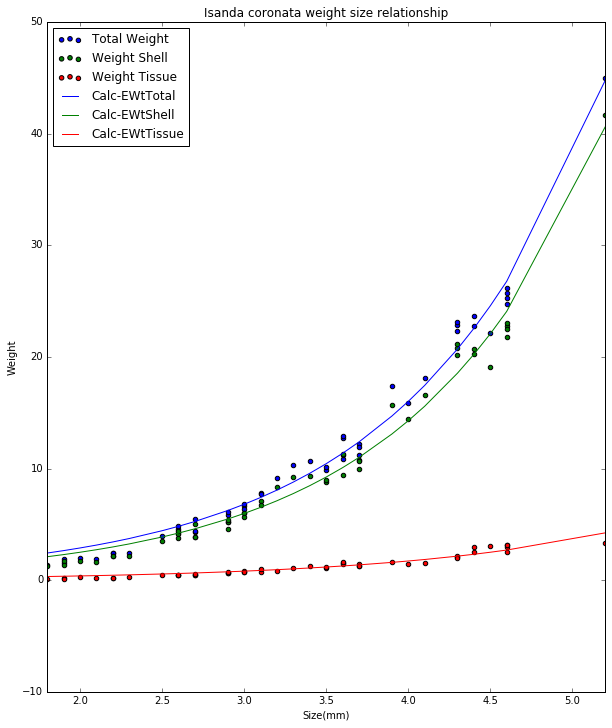

In [46]:
ax = df.plot.scatter(x='Size(mm)', y='WtTotal', color='Blue', label='Total Weight', figsize=(10, 12))
df.plot.scatter(x='Size(mm)', y='WtShell', color='Green', label='Weight Shell', ax=ax)
df.plot.scatter(x='Size(mm)', y='WtTissue', color='Red', label='Weight Tissue', ax=ax)
ax.grid()
ax.set_xlabel('Shell Size (mm) across umbilis')
ax.set_ylabel('Weight')
ax.set_title('Isanda coronata weight size relationship')

df.plot.line(x='Size(mm)', y='Calc-EWtTotal', color='Blue', ax=ax)
df.plot.line(x='Size(mm)', y='Calc-EWtShell', color='Green', ax=ax)
df.plot.line(x='Size(mm)', y='Calc-EWtTissue', color='Red', ax=ax)

### Size(mm) vs Tissue to Shell ratio 

The following plot shows the ratio of the weight of the tissue versus the weight of the shell. From this plot it appears that this ratio is independent of size.

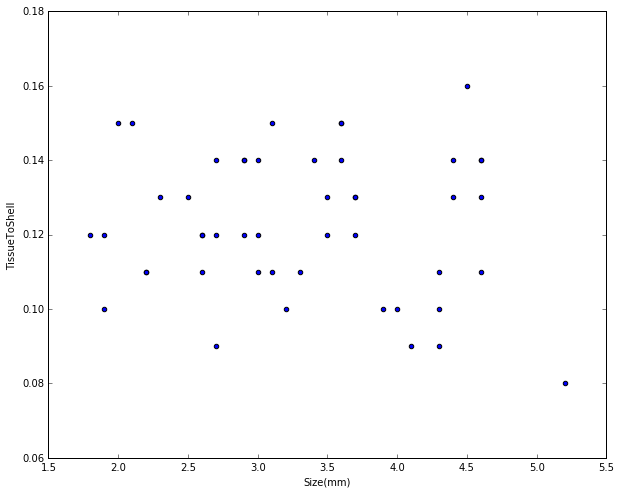

In [47]:
df.plot.scatter(x='Size(mm)', y='TissueToShell', figsize=(10, 8))